<h1><center><font color='blue'>Redes neuronales con 1 capa oculta</font></center></h1>


<h2>Objetivo</h2><ul><li> Clasificar digitos escritos a mano</li></ul> 


<h2>Tabla de contenido</h2>

<ul>
    <li><a href="#Model">Módulo Red neuronal y función de entrenamiento</a></li>
    <li><a href="#Makeup_Data">Crear algunos datos</a></li>
    <li><a href="#Train">Definir la red neuronal, optimizador y entrenar el modelo</a></li>
    <li><a href="#Result">Analizar los resultados</a></li>
</ul>

<hr>


<h2>Preparación</h2>


In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

Para graficar la pérdida: 


In [8]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

Para imprimir los parámetros del modelo:


In [9]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

Para desplegar los datos:


In [10]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

<!--Empty Space for separating topics-->


<h2 id="Model">Módulo Neural Network y función de entrenamiento</h2> 


Definimos la clase red neuronal:


In [11]:
# Define a Neural Network class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

Definimos una función para entrenar el modelo. En este caso retorna un diccionario para almacenar la pérdida de entrenamiento y la precisión sobre los datos de validación.


In [12]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Crear algunos datos</h2> 


Cargamos el dataset de entrenamiento estableciendo el parámetro train en True y convirtiéndolo a tensor mediante toTensor().


In [5]:
# Create training dataset

train_dataset = dsets.MNIST(root='/data/', train=True, download=True, transform=transforms.ToTensor())


Extracting /data/MNIST\raw\train-images-idx3-ubyte.gz to /data/MNIST\raw



Extracting /data/MNIST\raw\train-labels-idx1-ubyte.gz to /data/MNIST\raw



Extracting /data/MNIST\raw\t10k-images-idx3-ubyte.gz to /data/MNIST\raw



Extracting /data/MNIST\raw\t10k-labels-idx1-ubyte.gz to /data/MNIST\raw
Processing...
Done!


C:\Users\marco\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Cargamos el dataset de testing, aquí establecemos train en False:


In [13]:
# Create validating dataset

validation_dataset = dsets.MNIST(root='/data/', train=False, download=True, transform=transforms.ToTensor())

Creamos la función de criterio:  


In [14]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

Creamos los objetos cargadores de datos:


In [15]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Train">Definimos la red neuronal, optimizador y entrenamos el modelo</h2> 


Creamos el modelo con 100 neuronas:


In [16]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

Imprimimos los parámetros:


In [17]:
# Print the parameters for model

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


Definimos el optimizador y la tasa de aprendizaje:


In [18]:
# Set the learning rate and the optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Entrenamos el modelo con 100 epochs:


In [19]:
# Train the model

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

<!--Empty Space for separating topics-->


<h2 id="Result">Analizar los resultados</h2> 


Graficamos la pérdida total de entrenamiento o costo para cada iteración y la precisión de entrenamiento para cada epoch:


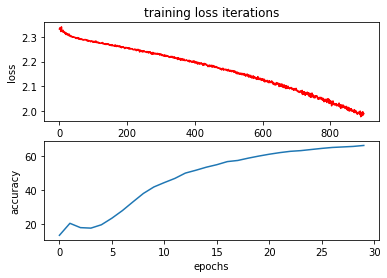

In [20]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

Graficamos las primeras 5 muestras mal clasificadas:  


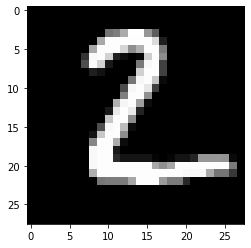

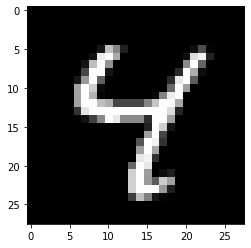

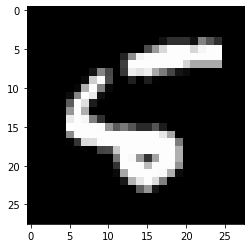

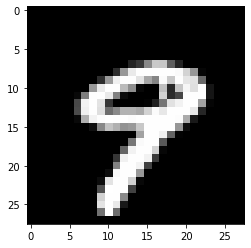

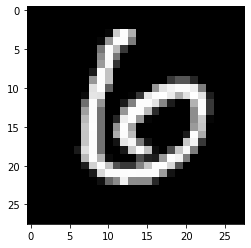

In [21]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

<h3>Práctica</h3> 


Use <code>nn.Sequential</code> para construir exactamente el mismo modelo anterior. Entrénelo y grafique.


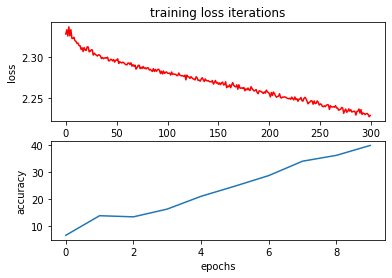

In [22]:
# Practice: Use nn.Sequential to build the same model. Use plot_accuracy_loss to print out the accuarcy and loss

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim),
)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)
plot_accuracy_loss(training_results)